In [1]:
# importing libraries 

import numpy as np 
import pandas as pd 
import plotly.express as px 

from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split 

import tensorflow as tf 

In [2]:
train_df = pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
test_df = pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')

sample = pd.read_csv('../input/health-insurance-cross-sell-prediction/sample_submission.csv')

In [3]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
sample.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


**Preprocessing**

In [9]:
# missing values ?

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
test_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [10]:
# encoding 

In [15]:
categorical_features = ['Gender' , 'Vehicle_Age' , 'Vehicle_Damage']

In [12]:
def get_unique(df , columns):
    return {column : list(df[column].unique()) for column in columns}

In [16]:
get_unique(train_df , categorical_features)

{'Gender': ['Male', 'Female'],
 'Vehicle_Age': ['> 2 Years', '1-2 Year', '< 1 Year'],
 'Vehicle_Damage': ['Yes', 'No']}

In [17]:
binary_features = ['Gender' , 'Vehicle_Damage']
ordinal_features = ['Vehicle_Age']

In [18]:
def binary_encoder(df , column , positive_label):
    df = df.copy()
    df[column] = df[column].apply(lambda x : 1 if x == positive_label else 0)
    return df

def ordinal_encoder(df , column , ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x : ordering.index(x))
    return df
    

In [19]:
age_ordering = ['< 1 Year' , '1-2 Year' , '> 2 Years']


In [20]:
train_df = ordinal_encoder(train_df , 'Vehicle_Age' , age_ordering)
test_df = ordinal_encoder(test_df , 'Vehicle_Age' , age_ordering)

In [22]:
train_df = binary_encoder(train_df , 'Gender' , 'Male')
test_df = binary_encoder(test_df , 'Gender' , 'Male')

train_df = binary_encoder(train_df , 'Vehicle_Damage' , 'Yes')
test_df = binary_encoder(test_df , 'Vehicle_Damage' , 'Yes')

In [23]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [24]:
test_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,0,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,0,0,30867.0,152.0,56
127033,508143,0,38,1,28.0,0,1,1,28700.0,122.0,165
127034,508144,1,21,1,46.0,1,0,0,29802.0,152.0,74
127035,508145,1,71,1,28.0,1,1,0,62875.0,26.0,265


**Splitting ans Scaling**

In [25]:
test_id = test_df['id'].tolist()

train_df = train_df.drop('id' , axis = 1)
test_df = test_df.drop('id' , axis = 1)

In [26]:
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [28]:
y = train_df['Response']
X = train_df.drop('Response' ,axis = 1)

<AxesSubplot:>

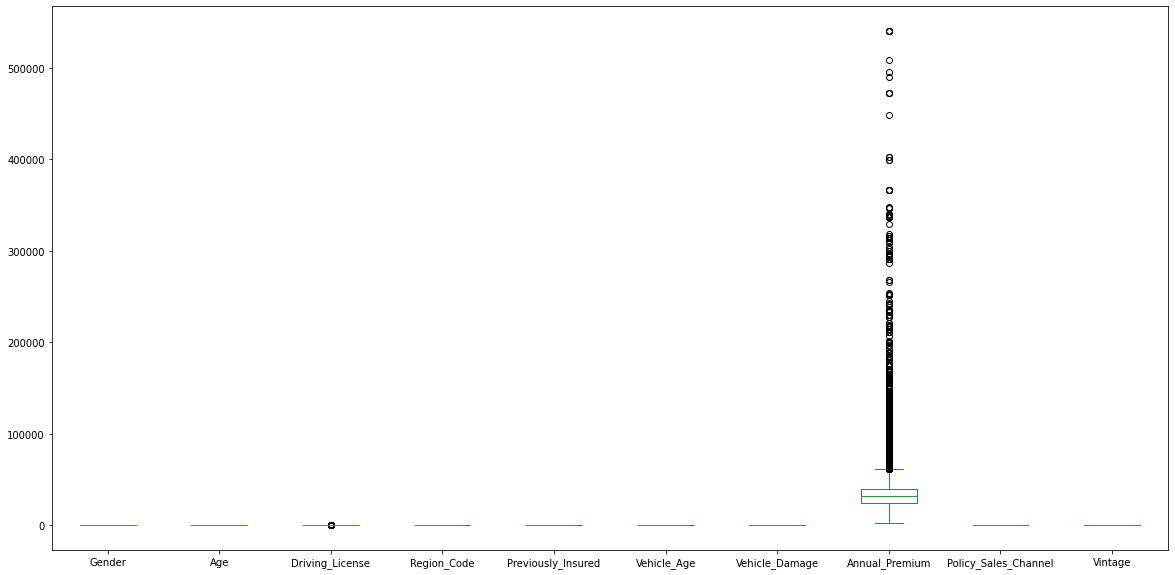

In [31]:
# checking for outlier to choose scaler 

X.plot(kind = 'box' , figsize = (20 , 10) )

<AxesSubplot:>

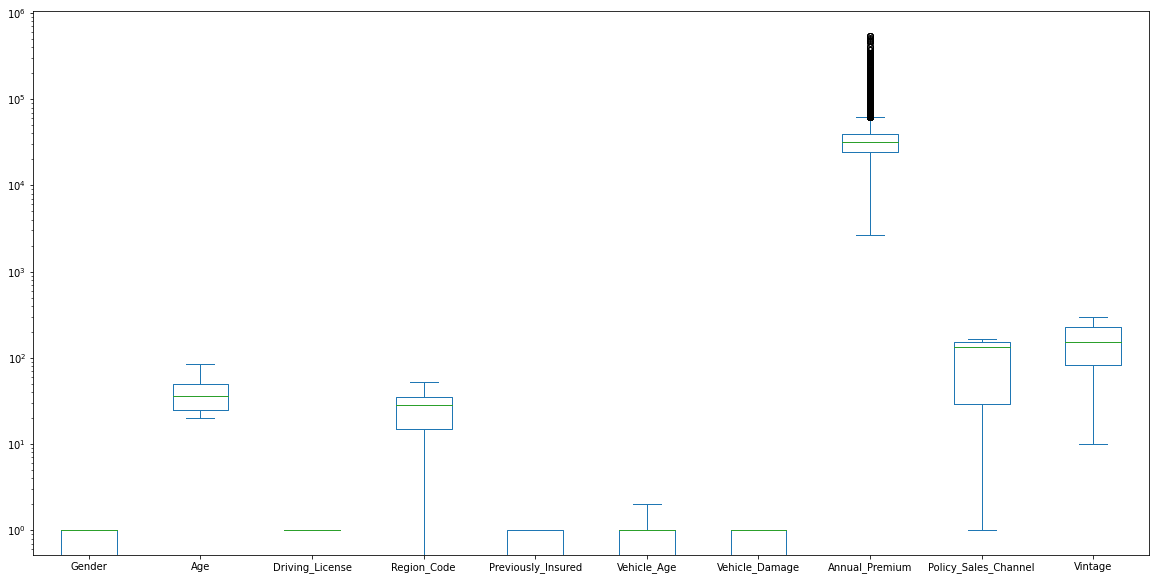

In [32]:
X.plot(kind = 'box' , figsize = (20 , 10) , logy = True)

In [33]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

test_df = scaler.fit_transform(test_df)

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.70)

**Build and train our model**

In [35]:
X.shape , y.shape

((381109, 10), (381109,))

In [38]:
(y.sum()/len(y))*100 # skew

12.256336113815209

In [39]:
inputs = tf.keras.Input(shape = (10 ,))

x = tf.keras.layers.Dense(64 , activation = 'relu')(inputs)
x = tf.keras.layers.Dense(64 , activation = 'relu')(x)

outputs = tf.keras.layers.Dense(1 , activation = 'sigmoid')(x)


model = tf.keras.Model(inputs = inputs , outputs = outputs)

2022-11-18 17:21:06.933890: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [40]:
model.compile(loss = 'binary_crossentropy' ,
             optimizer = 'adam' ,
             metrics = [tf.keras.metrics.AUC(name = 'auc')])

In [41]:
batch_size = 64 
epochs = 25

In [42]:
history = model.fit(X_train , y_train, epochs = epochs , validation_split = 0.20, batch_size = batch_size,
                   callbacks = [tf.keras.callbacks.ReduceLROnPlateau()])

2022-11-18 17:22:50.391332: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
3335/3335 [==============================] - 10s 3ms/step - loss: 0.2758 - auc: 0.8323 - val_loss: 0.2724 - val_auc: 0.8450
Epoch 2/25
3335/3335 [==============================] - 10s 3ms/step - loss: 0.2702 - auc: 0.8440 - val_loss: 0.2708 - val_auc: 0.8482
Epoch 3/25
3335/3335 [==============================] - 10s 3ms/step - loss: 0.2693 - auc: 0.8461 - val_loss: 0.2714 - val_auc: 0.8473
Epoch 4/25
3335/3335 [==============================] - 9s 3ms/step - loss: 0.2689 - auc: 0.8476 - val_loss: 0.2703 - val_auc: 0.8478
Epoch 5/25
3335/3335 [==============================] - 9s 3ms/step - loss: 0.2687 - auc: 0.8478 - val_loss: 0.2702 - val_auc: 0.8495
Epoch 6/25
3335/3335 [==============================] - 10s 3ms/step - loss: 0.2684 - auc: 0.8483 - val_loss: 0.2723 - val_auc: 0.8476
Epoch 7/25
3335/3335 [==============================] - 9s 3ms/step - loss: 0.2683 - auc: 0.8485 - val_loss: 0.2701 - val_auc: 0.8493
Epoch 8/25
3335/3335 [==============================] - 9s

In [43]:
fig = px.line(
history.history ,
y = ['loss' , 'val_loss'],
labels = {'index' : 'Epochs' , 'value' : 'Loss'},
title = 'Training History')
fig.show()

In [44]:
model.evaluate(X_test , y_test)

3573/3573 [==============================] - 6s 2ms/step - loss: 0.2688 - auc: 0.8512


[0.2688044607639313, 0.8512322902679443]

**Predictions and submission**

In [45]:
sample.head(2)

,id,Response
0,381110,0
1,381111,0


In [46]:
pred = model.predict(test_df)
pred

array([[2.2631884e-04],
       [3.4147671e-01],
       [2.8144526e-01],
       ...,
       [2.1505356e-04],
       [3.4055876e-05],
       [1.0727346e-03]], dtype=float32)

In [50]:
pred = list(map(lambda x : np.int(x[0]), pred >= 0.5))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [53]:
pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [55]:
sub = pd.concat([pd.Series(test_id) , pd.Series(pred)],axis=1)
sub.columns = ['id' , 'Response']

In [56]:
sub

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [57]:
sample

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [58]:
sub.to_csv('./submission.csv')